# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>XML to CSV Conversion</b></div>

In [1]:
import xml.etree.ElementTree as ET
import csv

xml_file_path = '/kaggle/input/india-air-quality-index2024-dataset/data_aqi_cpcb.xml'
csv_file_path = 'IndiaAQIcsv'

tree = ET.parse(xml_file_path)
root = tree.getroot()


with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    header = [
        "Country", "State", "City", "Station", "Latitude", "Longitude", "Last Update",
        "Pollutant", "Min", "Max", "Avg", "AQI", "Predominant Parameter"
    ]
    writer.writerow(header)

    
    for country in root.findall('Country'):
        country_id = country.get('id')
        for state in country.findall('State'):
            state_id = state.get('id')
            for city in state.findall('City'):
                city_id = city.get('id')
                for station in city.findall('Station'):
                    station_id = station.get('id')
                    latitude = station.get('latitude')
                    longitude = station.get('longitude')
                    last_update = station.get('lastupdate')
                    
                   
                    for pollutant in station.findall('Pollutant_Index'):
                        pollutant_id = pollutant.get('id')
                        min_val = pollutant.get('Min')
                        max_val = pollutant.get('Max')
                        avg_val = pollutant.get('Avg')
                        
                        
                        aqi_value = ""
                        predominant_param = ""
                        
                        
                        aqi = station.find('Air_Quality_Index')
                        if aqi is not None:
                            aqi_value = aqi.get('Value')
                            predominant_param = aqi.get('Predominant_Parameter')
                        
                        
                        writer.writerow([
                            country_id, state_id, city_id, station_id, latitude, longitude,
                            last_update, pollutant_id, min_val, max_val, avg_val,
                            aqi_value, predominant_param
                        ])

print("XML data has been successfully converted to CSV!")


XML data has been successfully converted to CSV!


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>Import libraries and load data</b></div>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/working/IndiaAQIcsv")
print(df.head())
print(df.isnull().sum())
print(df.info())

  Country           State       City                         Station  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

    Latitude  Longitude          Last Update Pollutant  Min  Max  Avg  AQI  \
0  16.515083  80.518167  20-11-2023 12:00:00     PM2.5  NaN  NaN  NaN  NaN   
1  16.515083  80.518167  20-11-2023 12:00:00      PM10  NaN  NaN  NaN  NaN   
2  16.515083  80.518167  20-11-2023 12:00:00       SO2  NaN  NaN  NaN  NaN   
3  16.515083  80.518167  20-11-2023 12:00:00        CO  NaN  NaN  NaN  NaN   
4  16.515083  80.518167  20-11-2023 12:00:00     OZONE  NaN  NaN  NaN  NaN   

  Predominant Parameter  
0                   NaN  
1                   NaN  
2                   

In [3]:
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)


In [4]:
print(df.isnull().sum())

Country                  0
State                    0
City                     0
Station                  0
Latitude                 0
Longitude                0
Last Update              0
Pollutant                0
Min                      0
Max                      0
Avg                      0
AQI                      0
Predominant Parameter    0
dtype: int64


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>EDA</b></div>

In [5]:
print(df.describe())
print(df['Country'].value_counts())
print(df['State'].value_counts())
print(df['City'].value_counts())
print(df['Pollutant'].value_counts())


          Latitude    Longitude          Min          Max          Avg  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000   
mean     22.795529    78.455119    34.095269   100.117455    60.659054   
std       5.416659     4.800781    44.156667   110.883612    73.399435   
min       8.514909    70.909168     1.000000     1.000000     1.000000   
25%      19.063214    75.467934     6.000000    21.000000    13.000000   
50%      23.500160    77.296291    18.000000    67.000000    35.000000   
75%      27.213494    80.262850    39.000000   119.000000    71.000000   
max      34.066206    94.636574   357.000000   500.000000   419.000000   

               AQI  
count  3285.000000  
mean    162.007890  
std      95.314515  
min      15.000000  
25%      87.000000  
50%     145.000000  
75%     227.000000  
max     419.000000  
Country
India    3285
Name: count, dtype: int64
State
Maharashtra         569
Uttar_Pradesh       359
Rajasthan           313
Karnataka         

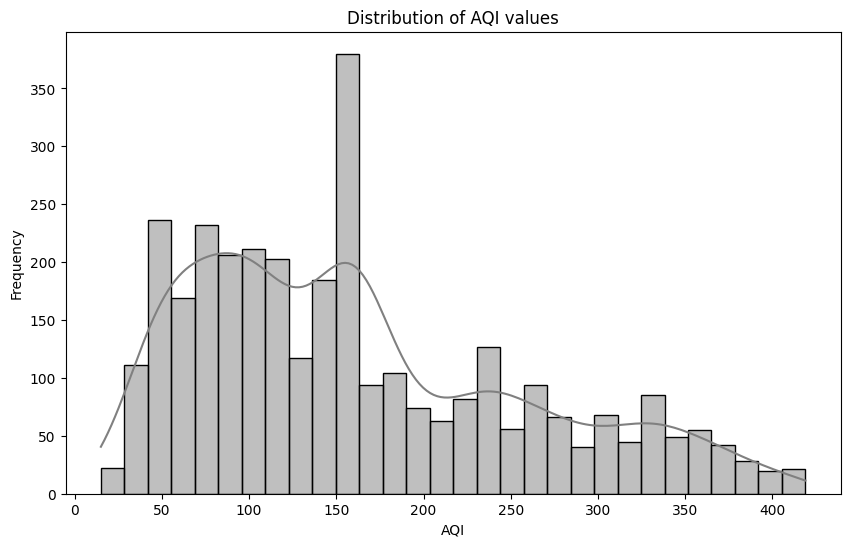

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True,color='grey')
plt.title('Distribution of AQI values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

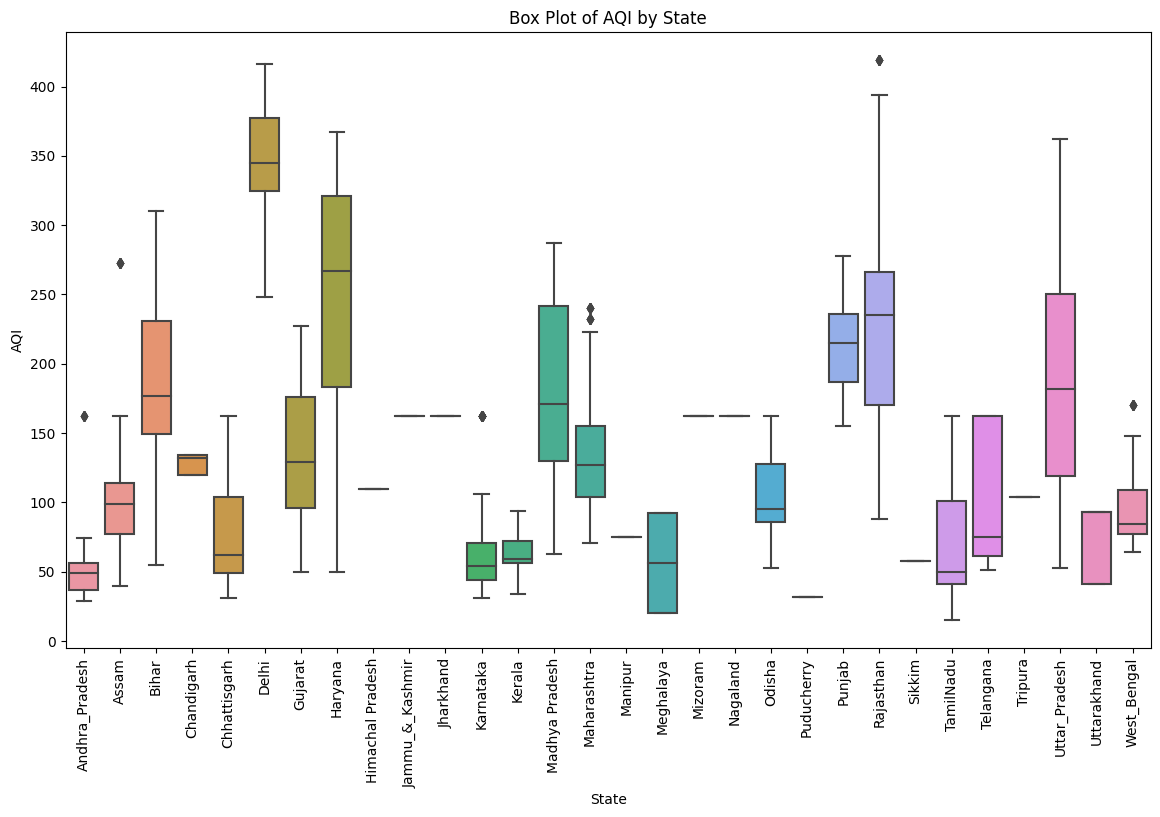

In [7]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='AQI', data=df)
plt.title('Box Plot of AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

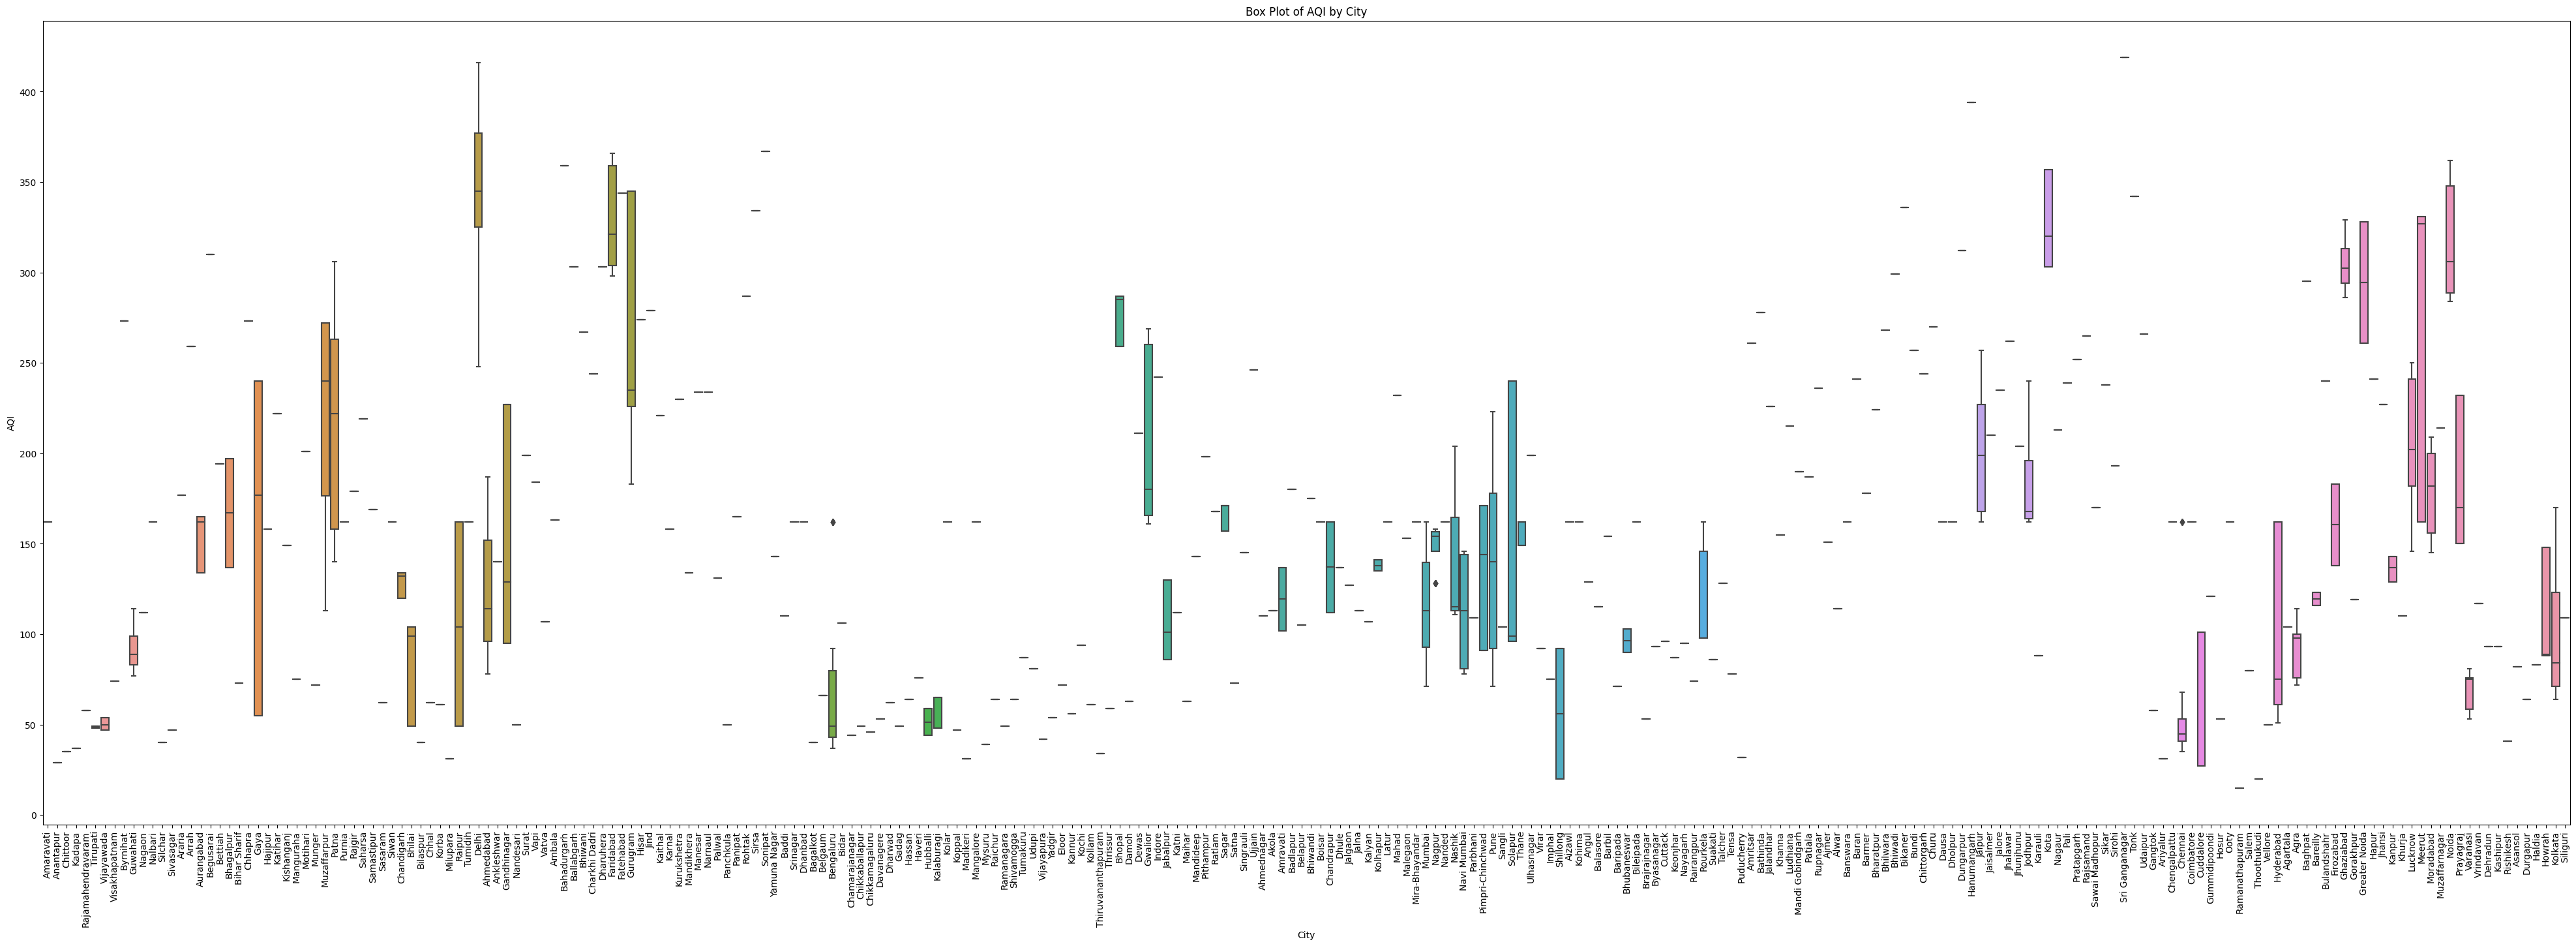

In [8]:
plt.figure(figsize=(50, 16))
sns.boxplot(x='City', y='AQI', data=df)
plt.title('Box Plot of AQI by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

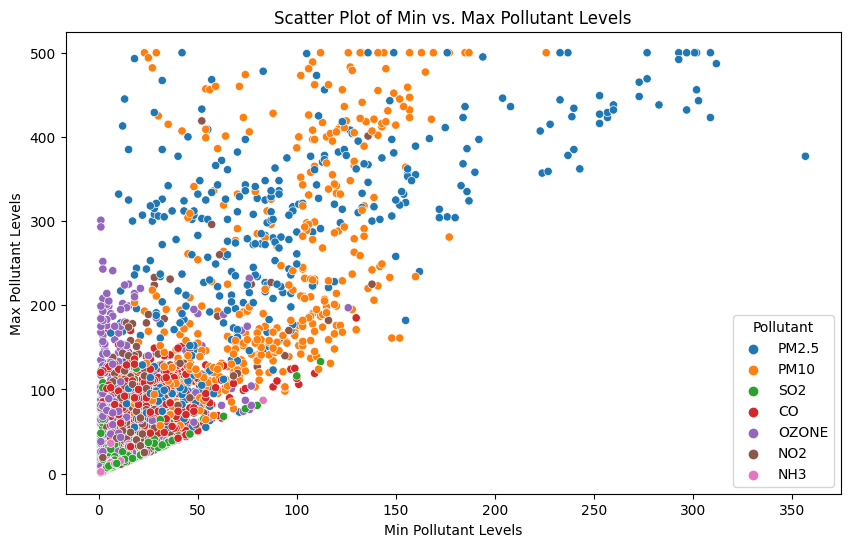

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min', y='Max', hue='Pollutant', data=df)
plt.title('Scatter Plot of Min vs. Max Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('Max Pollutant Levels')
plt.show()

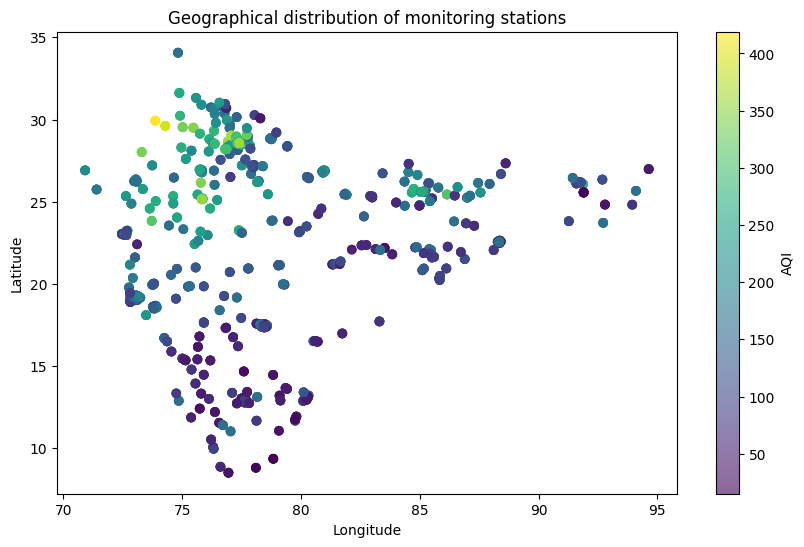

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['AQI'], cmap='viridis', alpha=0.6)
plt.colorbar(label='AQI')
plt.title('Geographical distribution of monitoring stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

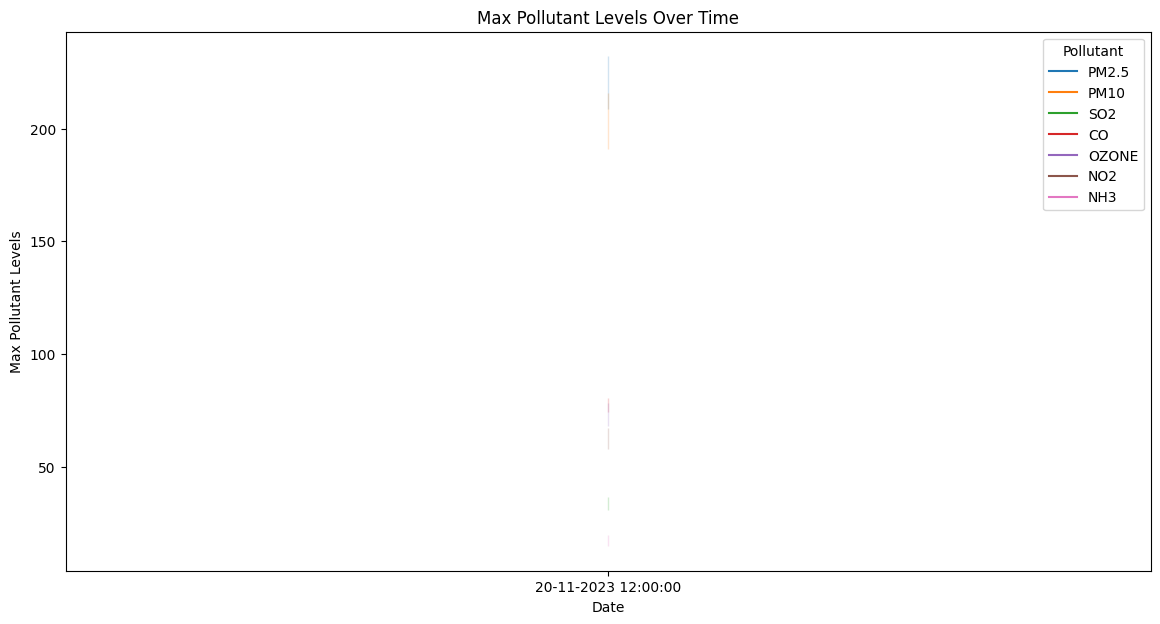

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Last Update', y='Max', hue='Pollutant', data=df)
plt.title('Max Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Max Pollutant Levels')
plt.show()

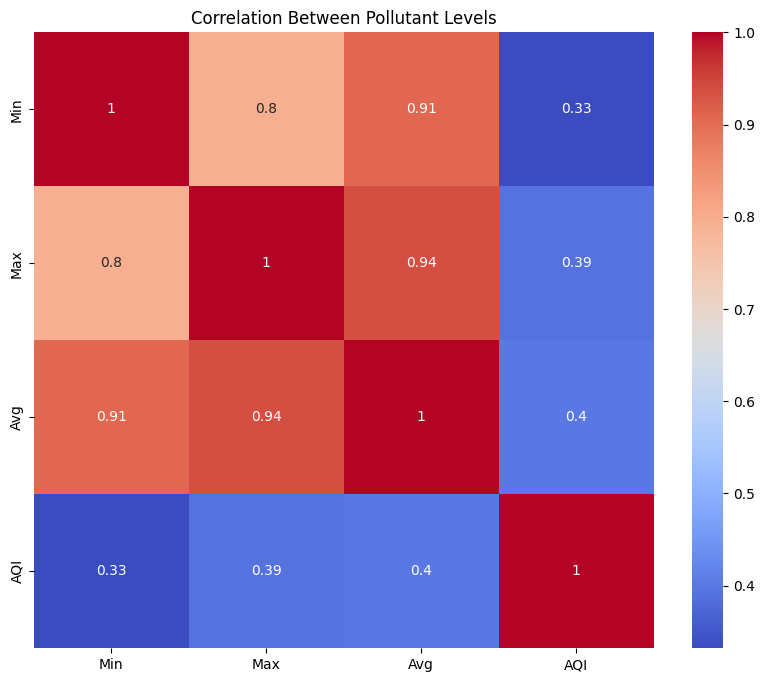

In [12]:
plt.figure(figsize=(10, 8))
correlation = df[['Min', 'Max', 'Avg', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutant Levels')
plt.show()

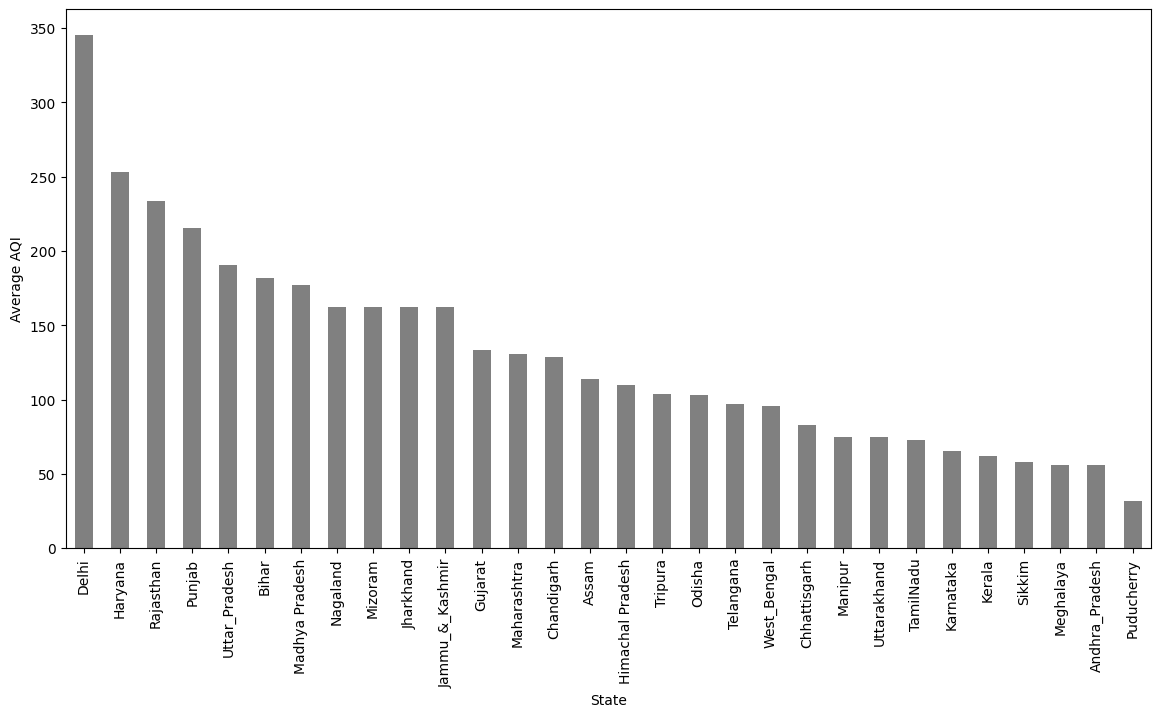

In [13]:
plt.figure(figsize=(14, 7))
state_aqi = df.groupby('State')['AQI'].mean().sort_values(ascending=False)
state_aqi.plot(kind='bar', color='grey')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.show()

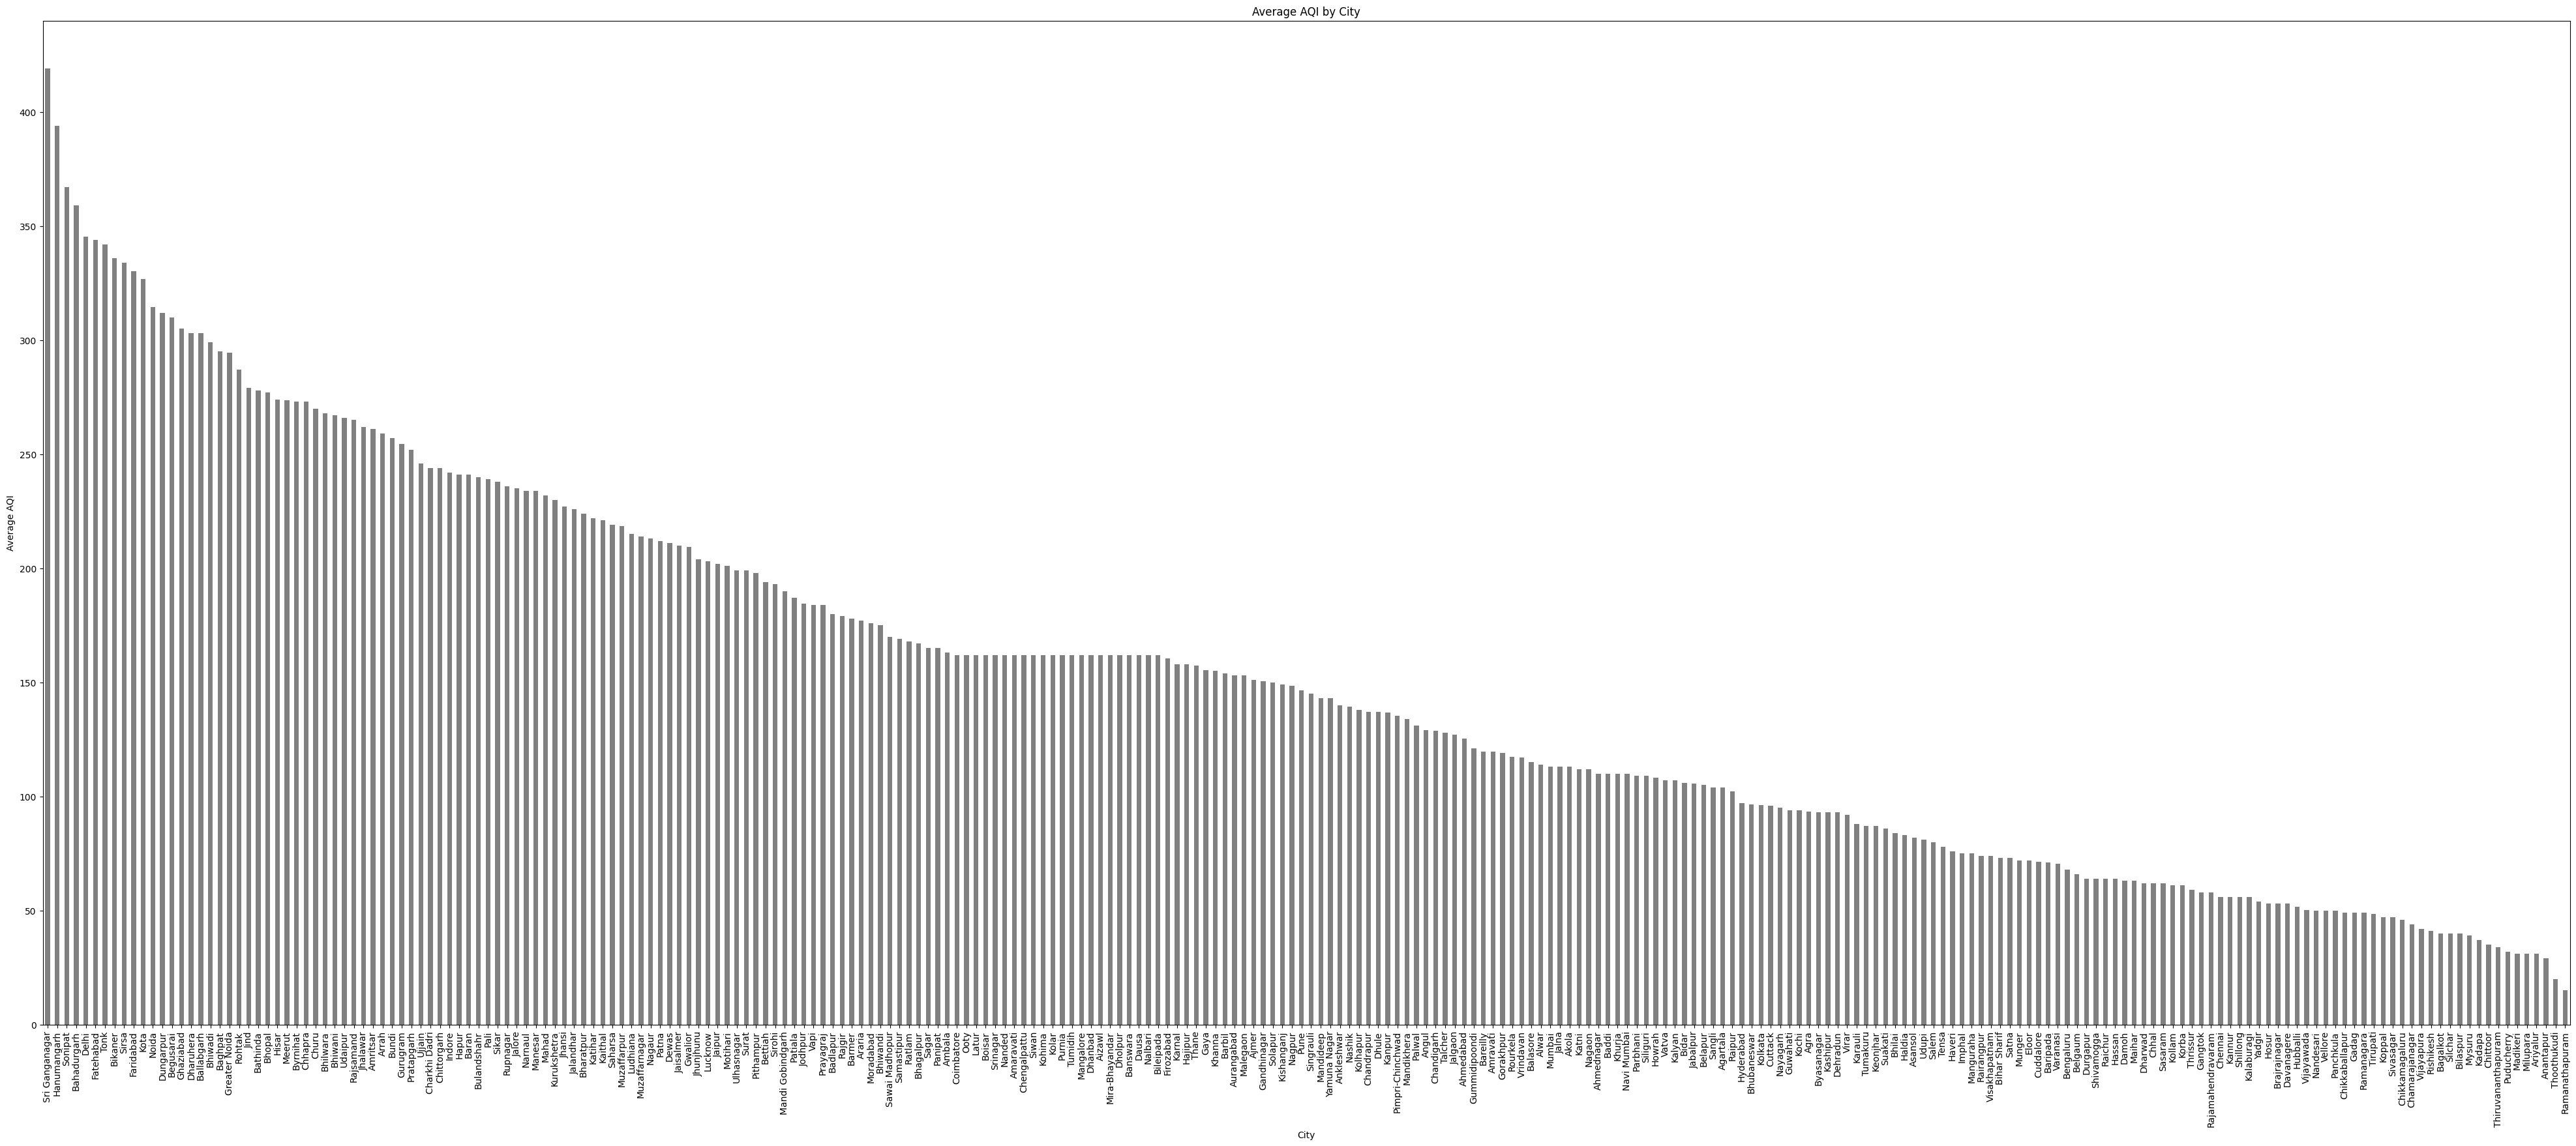

In [14]:
plt.figure(figsize=(50,20))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_aqi.plot(kind='bar',color='grey')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()


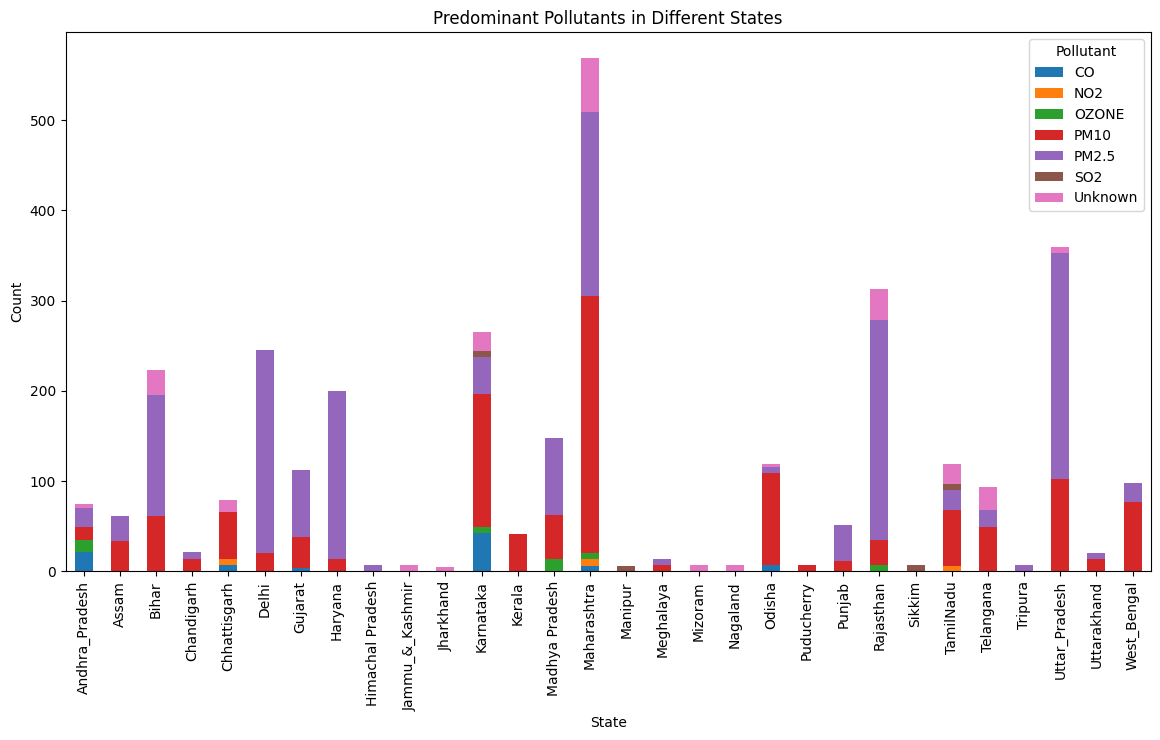

In [15]:
predominant_pollutants = df.groupby(['State', 'Predominant Parameter']).size().unstack().fillna(0)
predominant_pollutants.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Predominant Pollutants in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Pollutant')
plt.show()

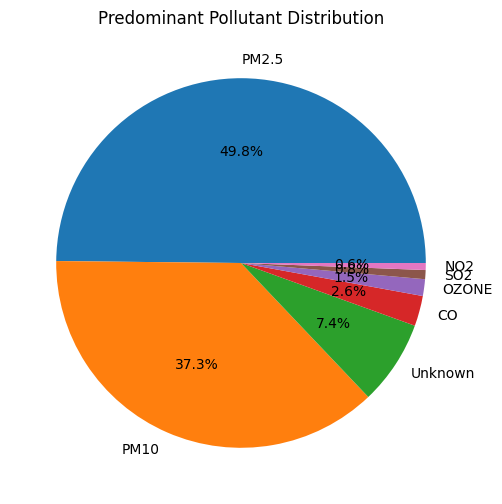

In [16]:
predominant_pollutants = df['Predominant Parameter'].value_counts()
plt.figure(figsize=(10, 6))
predominant_pollutants.plot(kind='pie', autopct='%1.1f%%')
plt.title('Predominant Pollutant Distribution')
plt.ylabel('')
plt.show()

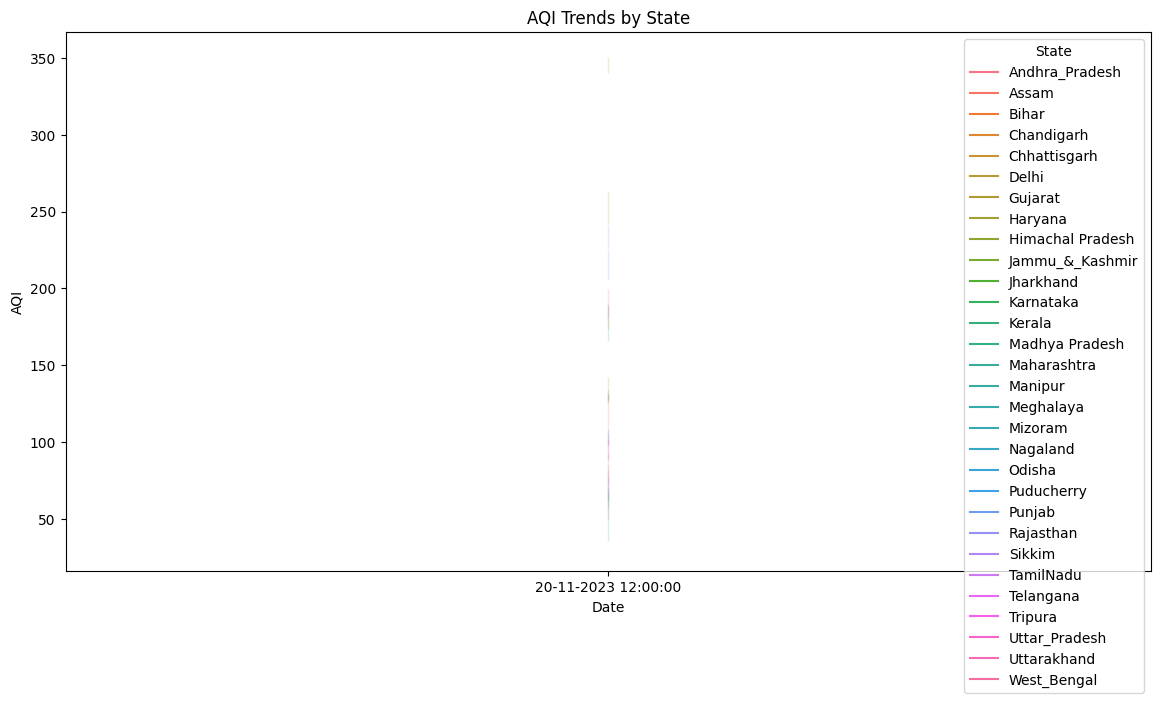

In [17]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Last Update', y='AQI', hue='State', data=df)
plt.title('AQI Trends by State')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

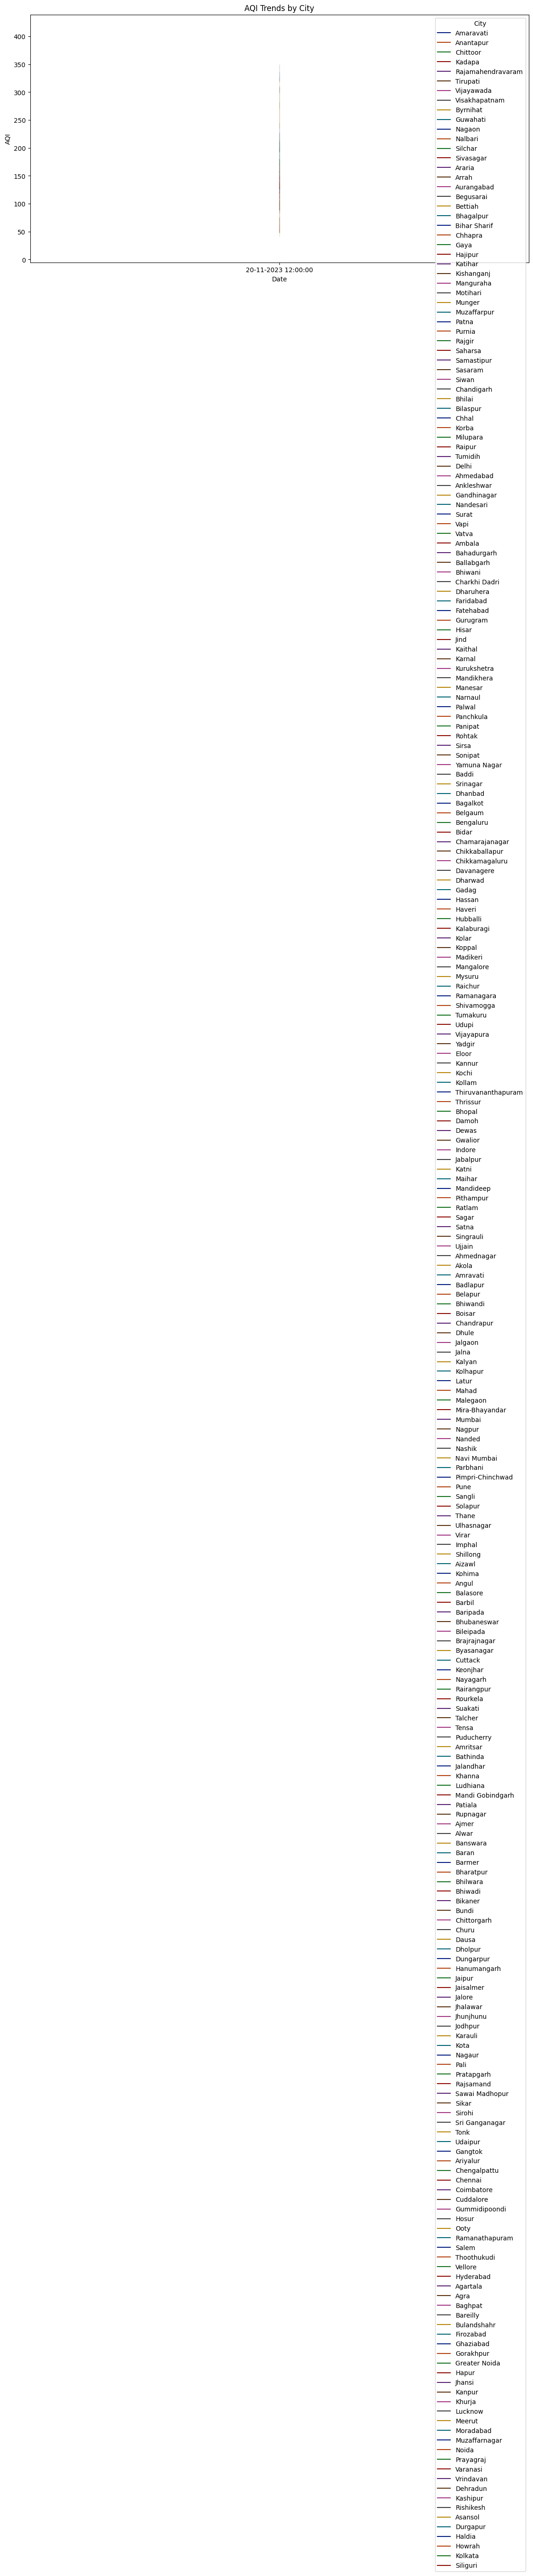

In [18]:
plt.figure(figsize=(14, 7))
dark_palette = sns.color_palette("dark", n_colors=len(df['City'].unique()))
sns.lineplot(x='Last Update', y='AQI', hue='City', data=df, palette=dark_palette)
plt.title('AQI Trends by City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

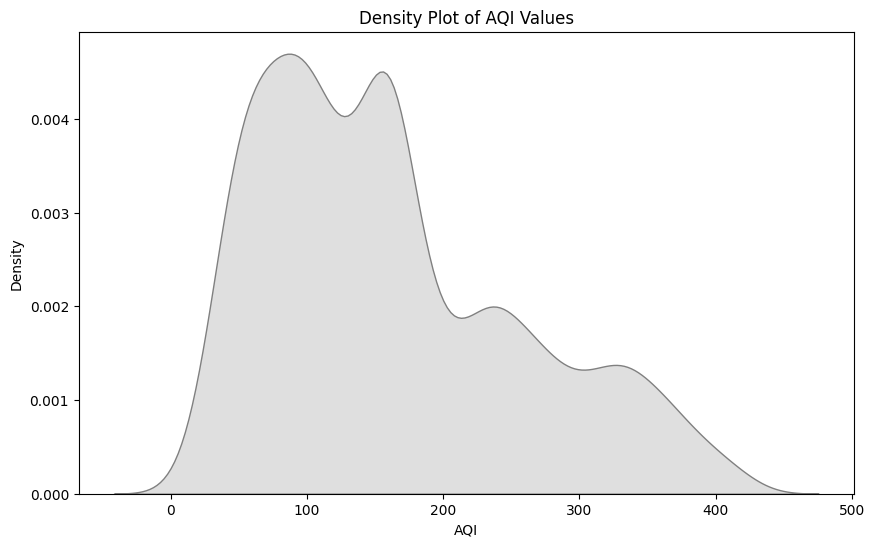

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AQI'], shade=True,color='grey')
plt.title('Density Plot of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

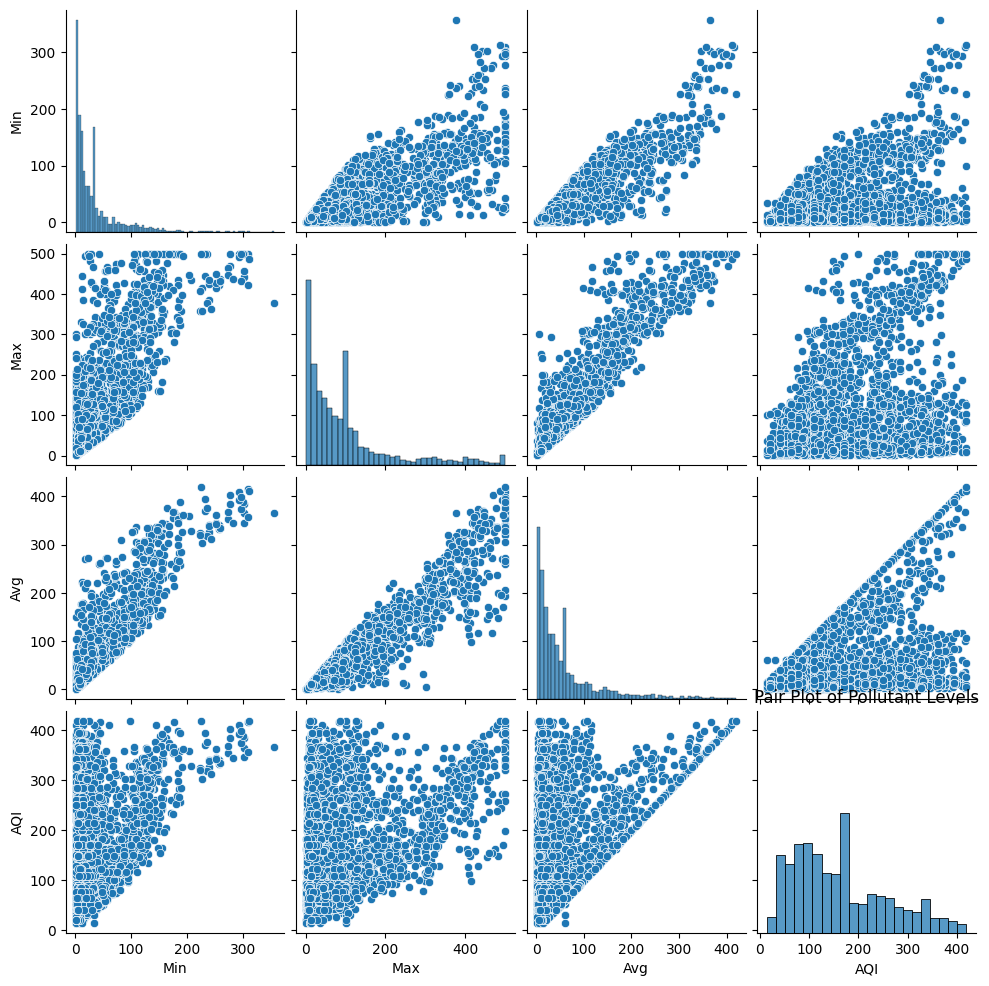

In [20]:
sns.pairplot(df[['Min', 'Max', 'Avg', 'AQI']], palette='grey')
plt.title('Pair Plot of Pollutant Levels')
plt.show

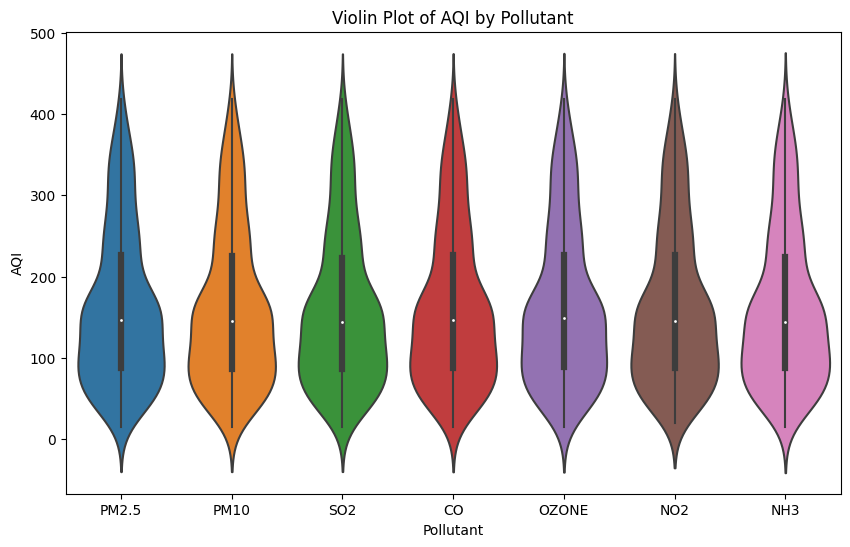

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pollutant', y='AQI', data=df)
plt.title('Violin Plot of AQI by Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('AQI')
plt.show()


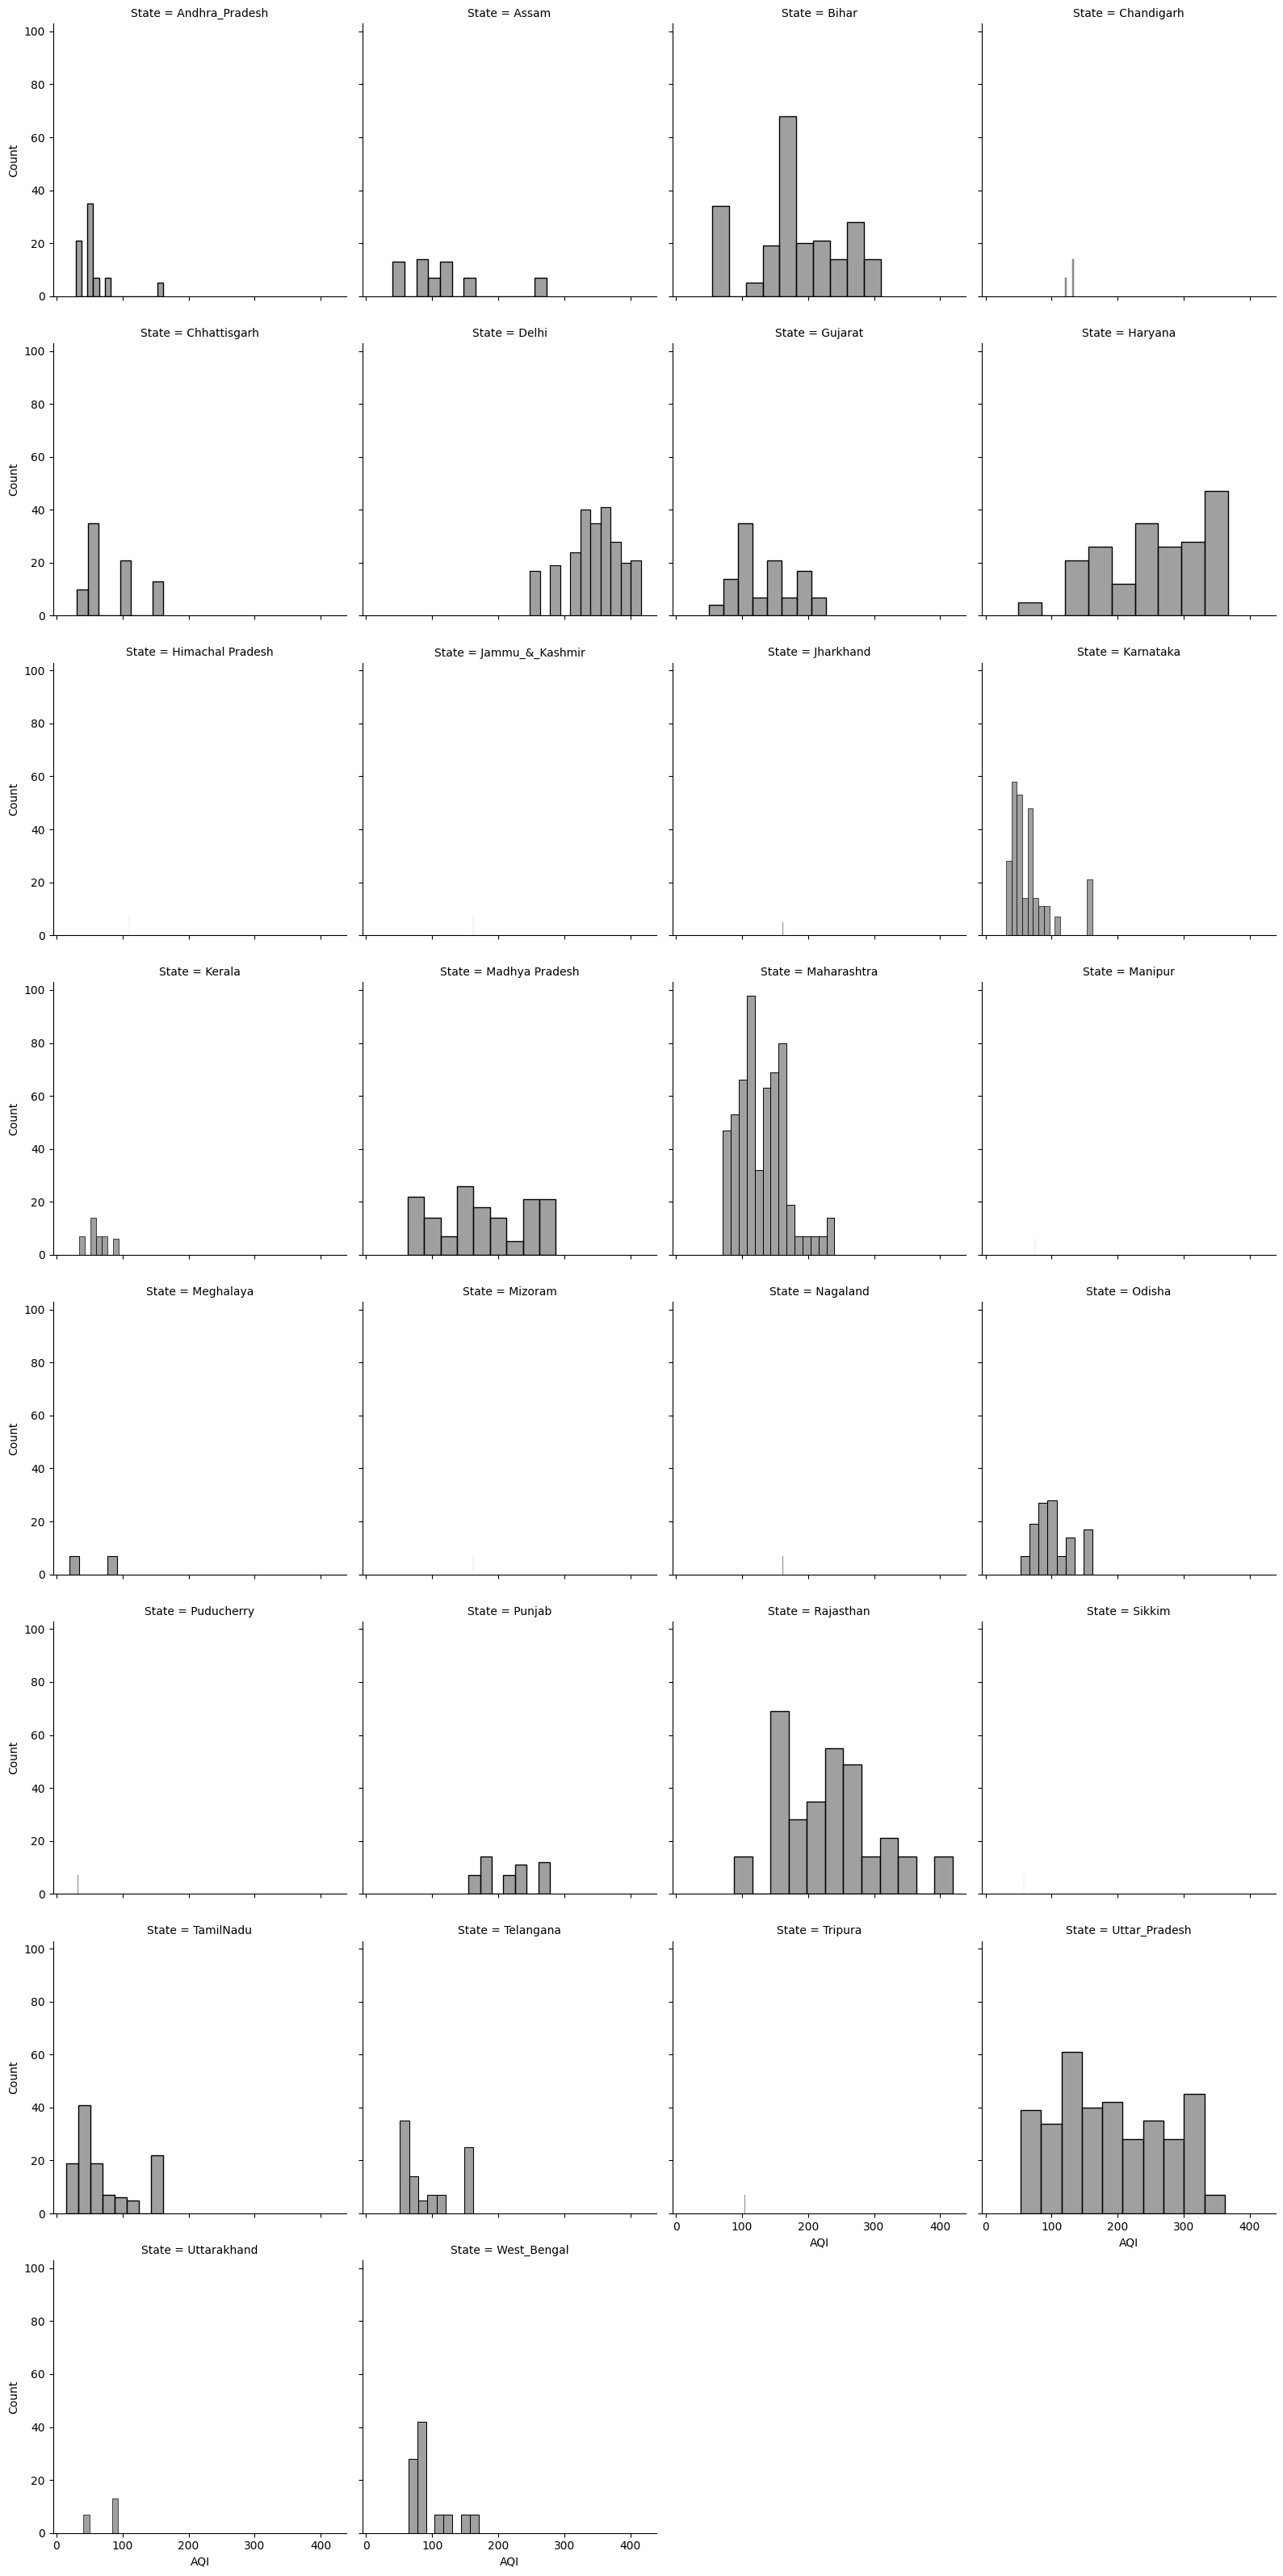

In [22]:
g = sns.FacetGrid(df, col='State', col_wrap=4, height=4)
g.map(sns.histplot, 'AQI', color='grey')  # Set the color to grey
plt.show()

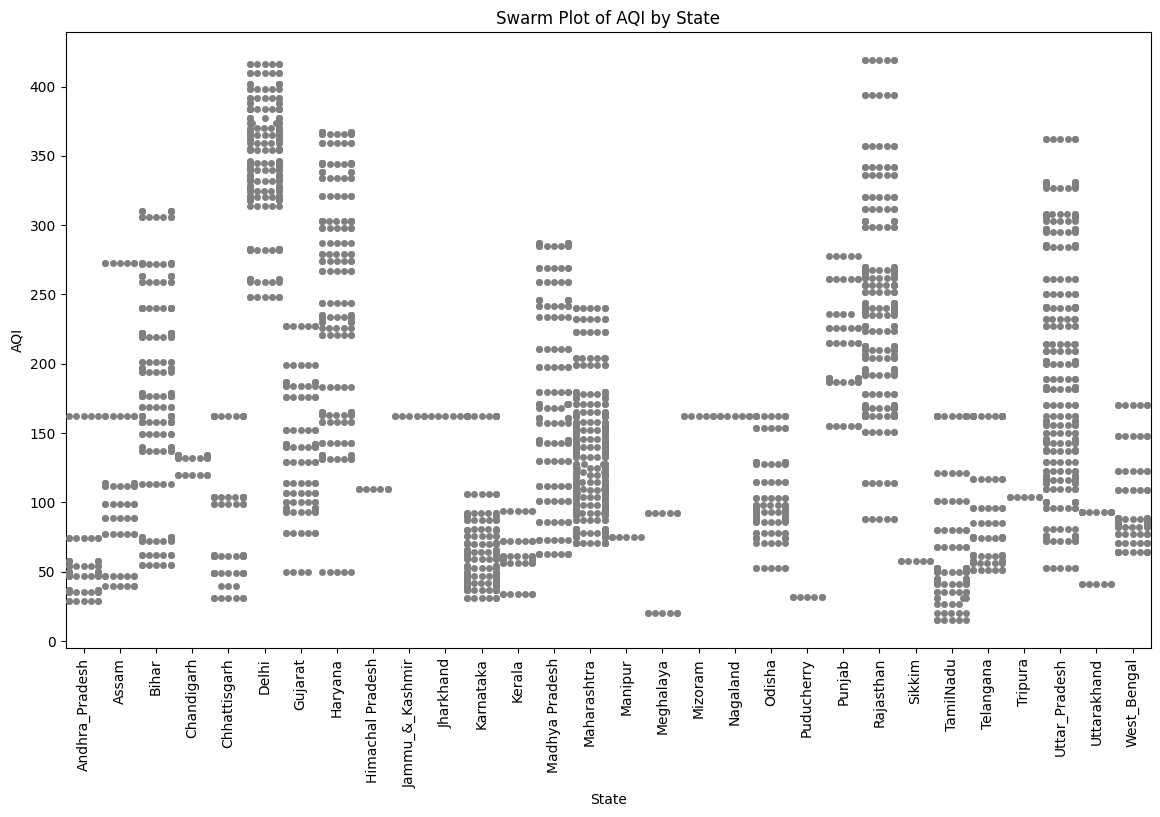

In [23]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='State', y='AQI', data=df, color='grey')
plt.title('Swarm Plot of AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()


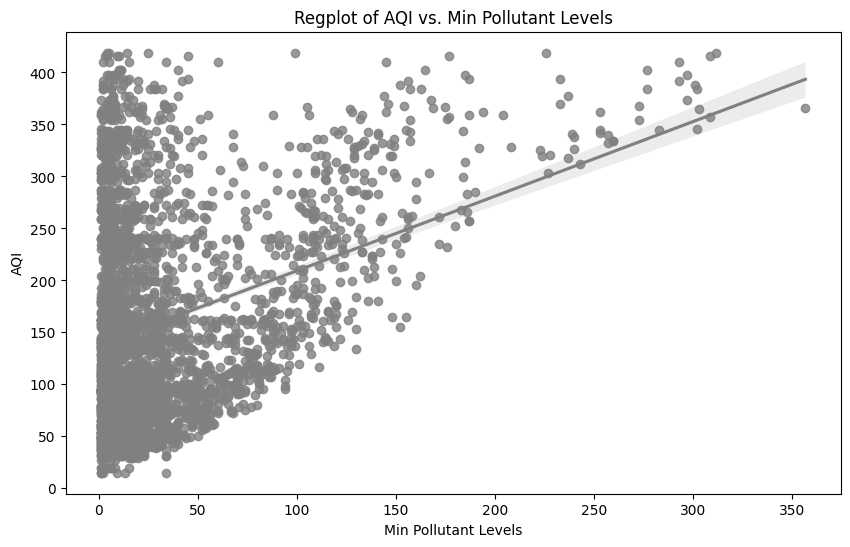

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Min', y='AQI', data=df,color='grey')
plt.title('Regplot of AQI vs. Min Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('AQI')
plt.show()

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083   ; overflow:hidden"><b>Model</b></div>

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
X = df_encoded.drop(columns=['AQI'])  
y = df_encoded['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 23.22303851927788
R^2 Score: 0.9974837762405427


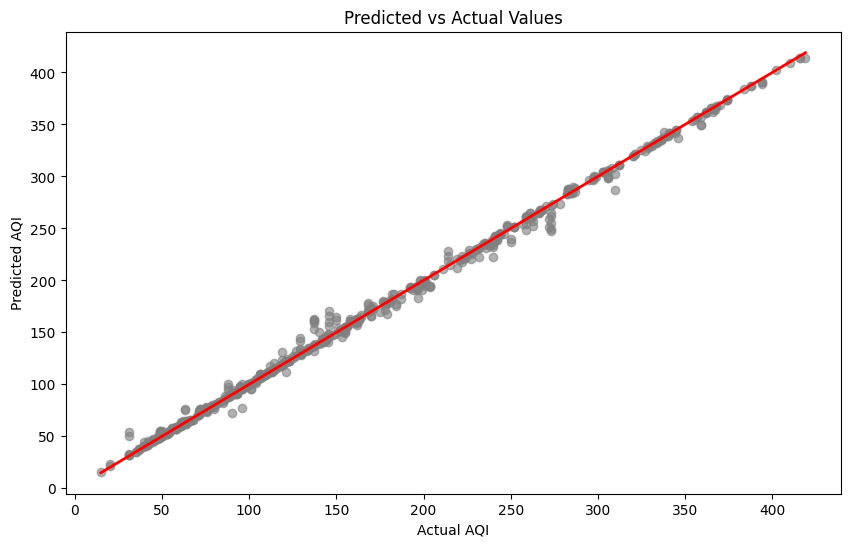

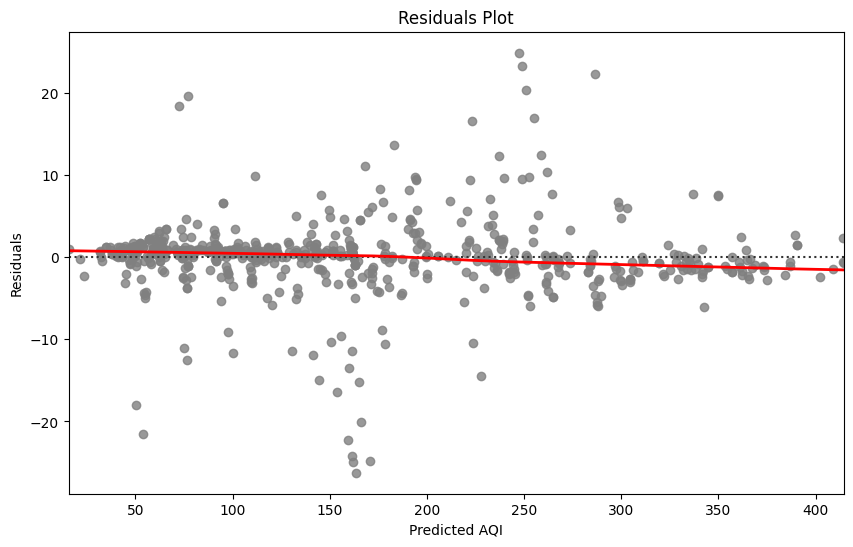

In [27]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='grey', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="grey", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()


<div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#7E8083 ; overflow:hidden">
  <b></b><br>
  If you found this notebook helpful, please consider upvoting it! Thank you!
</div>